In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import mglearn

import matplotlib.pyplot as plt

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


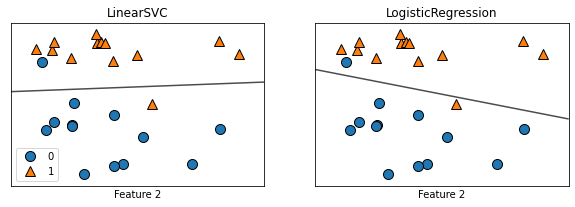

In [11]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('Feature 1')
    ax.set_xlabel('Feature 2')

axes[0].legend()

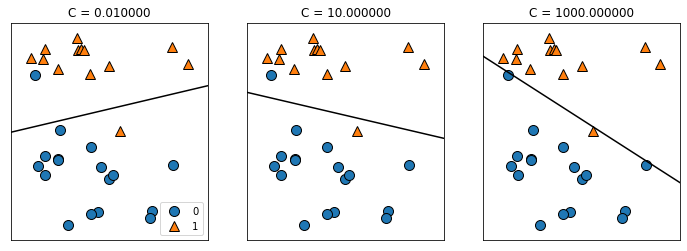

In [12]:
mglearn.plots.plot_linear_svc_regularization()

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [20]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42
)

lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)

print(f'Train score: {lr.score(X_train, y_train)}')
print(f'Test score: {lr.score(X_test, y_test)}')

Train score: 0.9577464788732394
Test score: 0.958041958041958


In [24]:
lr_100 = LogisticRegression(max_iter=100000, C=100)
lr_100.fit(X_train, y_train)

print(f'Train score: {lr_100.score(X_train, y_train)}')
print(f'Test score: {lr_100.score(X_test, y_test)}')

Train score: 0.9812206572769953
Test score: 0.965034965034965


In [25]:
lr_001 = LogisticRegression(max_iter=100000, C=0.01)
lr_001.fit(X_train, y_train)

print(f'Train score: {lr_001.score(X_train, y_train)}')
print(f'Test score: {lr_001.score(X_test, y_test)}')

Train score: 0.9530516431924883
Test score: 0.951048951048951


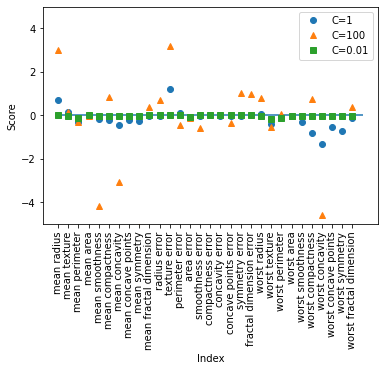

In [26]:
plt.plot(lr.coef_.T, 'o', label='C=1')
plt.plot(lr_100.coef_.T, '^', label='C=100')
plt.plot(lr_001.coef_.T, 's', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

plt.xlabel('Index')
plt.ylabel('Score')

plt.legend()

Train C=0.001, score: 0.9131455399061033
Test C=0.001, score: 0.9230769230769231
Train C=1, score: 0.960093896713615
Test C=1, score: 0.958041958041958
Train C=100, score: 0.9859154929577465
Test C=100, score: 0.9790209790209791


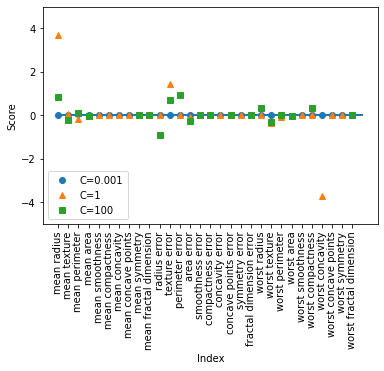

In [37]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 's']):
    lr = LogisticRegression(C=C, penalty='l1', solver='liblinear')
    lr.fit(X_train, y_train)
    
    print(f'Train C={C}, score: {lr.score(X_train, y_train)}')
    print(f'Test C={C}, score: {lr.score(X_test, y_test)}')

    plt.plot(lr.coef_.T, marker, label=f'C={C}')

    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])

    plt.xlabel('Index')
    plt.ylabel('Score')

    plt.ylim(-5, 5)
    plt.legend(loc=3)

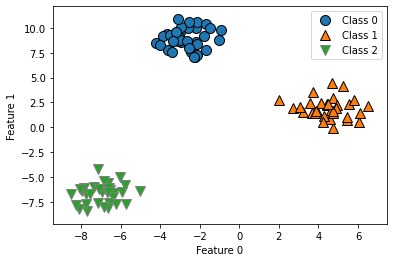

In [39]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [41]:
svc = LinearSVC()
svc.fit(X, y)

print(f'Coef form: {svc.coef_.shape}')
print(f'Const form: {svc.intercept_.shape}')

Coef form: (3, 2)
Const form: (3,)


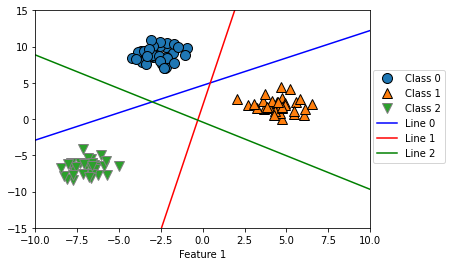

In [45]:
import numpy as np

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(svc.coef_, svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-15, 15)
plt.xlim(-10, 10)

plt.xlabel('Feature 0')
plt.xlabel('Feature 1')

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line 0', 'Line 1', 'Line 2'], loc=(1.01, 0.3))

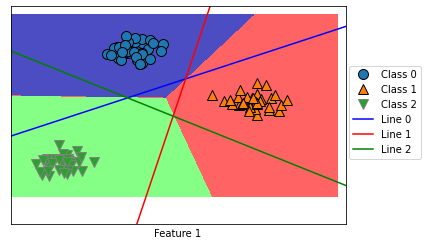

In [46]:
mglearn.plots.plot_2d_classification(svc, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(svc.coef_, svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-15, 15)
plt.xlim(-10, 10)

plt.xlabel('Feature 0')
plt.xlabel('Feature 1')

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line 0', 'Line 1', 'Line 2'], loc=(1.01, 0.3))